Saving sample_feedback_dataset.csv to sample_feedback_dataset (1).csv


/tmp/ipython-input-3995364326.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='Blues')


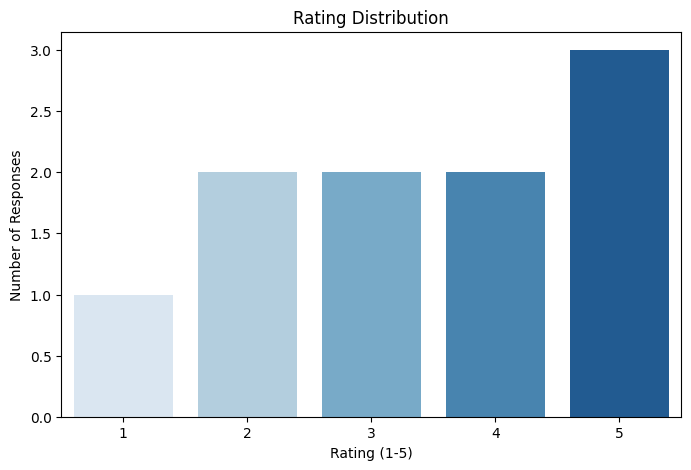

/tmp/ipython-input-3995364326.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set2')


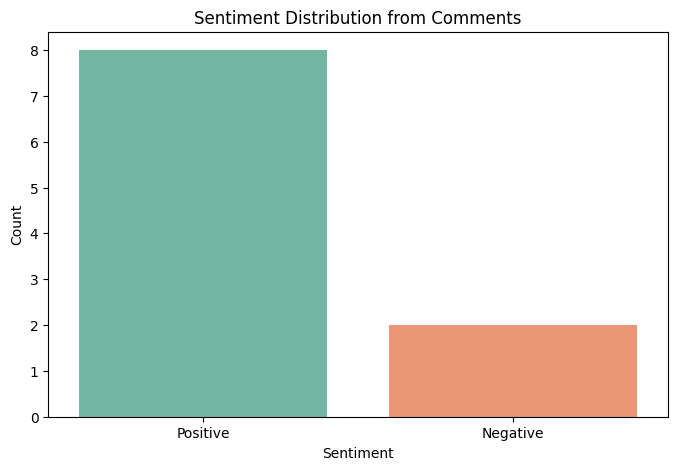

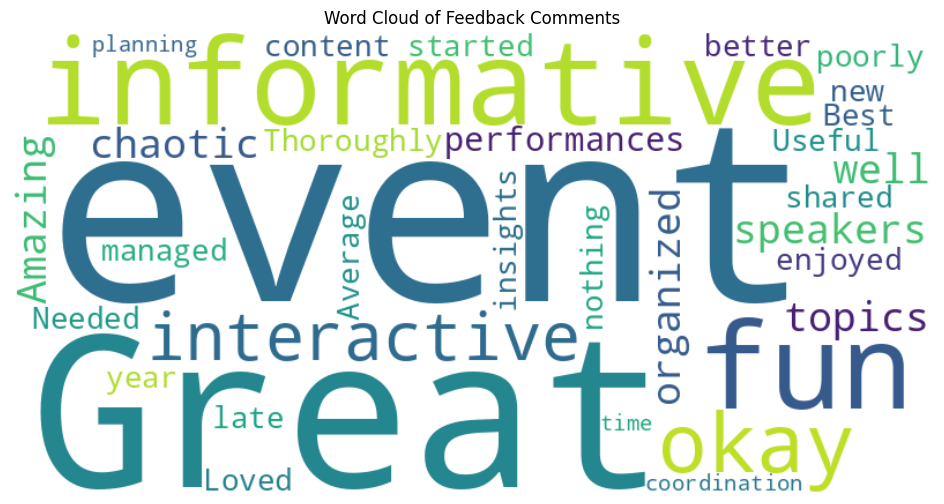

/tmp/ipython-input-3995364326.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Rating', data=df, palette='coolwarm')


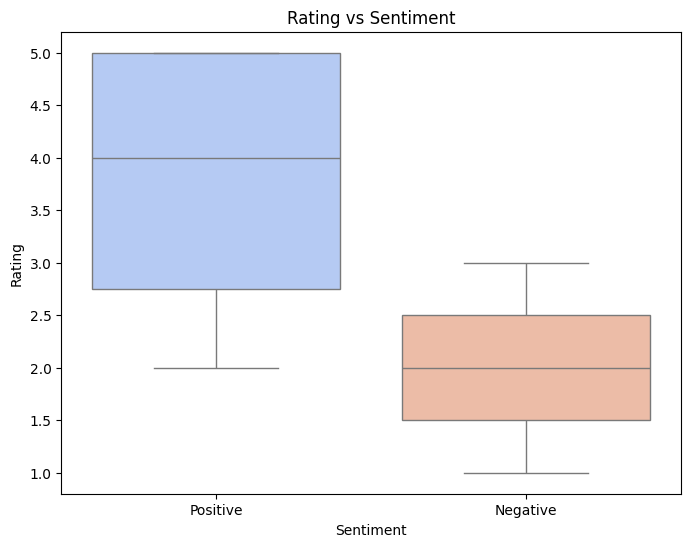

Sentiment Summary:

  Sentiment  Count
0  Positive      8
1  Negative      2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
# -------------------------------
# 📌 College Event Feedback Analysis
# Future Interns - Task 3
# -------------------------------

# ✅ Step 1: Install Required Libraries (if needed)
!pip install textblob --quiet
!pip install wordcloud --quiet

# ✅ Step 2: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

# ✅ Step 3: Upload the CSV File
from google.colab import files
uploaded = files.upload()

# ✅ Step 4: Load Dataset
df = pd.read_csv(next(iter(uploaded)))
df.head()

# ✅ Step 5: Data Cleaning
# Rename columns if needed (e.g., 'Rating', 'Comments')
df.columns = [col.strip() for col in df.columns]  # Remove spaces
df = df.dropna(subset=['Rating', 'Comments'])     # Drop rows with missing feedback
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')  # Ensure ratings are numeric
df = df.dropna(subset=['Rating'])  # Drop rows with invalid ratings

# ✅ Step 6: Sentiment Analysis using TextBlob
def get_sentiment(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['Comments'].apply(get_sentiment)

# ✅ Step 7: Rating Distribution Plot
plt.figure(figsize=(8,5))
sns.countplot(x='Rating', data=df, palette='Blues')
plt.title("Rating Distribution")
plt.xlabel("Rating (1-5)")
plt.ylabel("Number of Responses")
plt.show()

# ✅ Step 8: Sentiment Count Plot
plt.figure(figsize=(8,5))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title("Sentiment Distribution from Comments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# ✅ Step 9: Word Cloud of Feedback Comments
all_comments = ' '.join(df['Comments'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Feedback Comments")
plt.show()

# ✅ Step 10: Correlation Between Rating and Sentiment
plt.figure(figsize=(8,6))
sns.boxplot(x='Sentiment', y='Rating', data=df, palette='coolwarm')
plt.title("Rating vs Sentiment")
plt.show()

# ✅ Step 11: Summary Table
summary = df['Sentiment'].value_counts().reset_index()
summary.columns = ['Sentiment', 'Count']
print("Sentiment Summary:\n")
print(summary)

# ✅ Step 12: Export Processed Data (Optional)
df.to_csv('processed_feedback.csv', index=False)
files.download('processed_feedback.csv')
